In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

In [6]:
#read 
df=pd.read_csv('../../data/00-raw-data/WC2022 rawdata.csv',index_col=0)
df

,source,author_id,conversation_id,Tweet Point,Follows,Likes,hash_tag,id,text,keyword,official,unofficial
created_at,,,,,,,,,,,,
2022-09-13T23:58:10.000Z,Twitter Web App,1447697889032122369,1569660725064499201,-0.2960,1324,594,qatar2022,1569837876229152770,@Dr_alhammadi_22 They are also the graves of t...,qatar2022,1,0
2022-09-13T23:31:59.000Z,Twitter for iPhone,2986480875,1569805328589389830,-0.4515,697325,2907,"qatar2022,fifaworldcup",1569831285656371200,@DolapoAina @FIFAWorldCup @qatarairways @aviat...,qatar2022,1,0
2022-09-13T23:20:24.000Z,Twitter for iPhone,3133369339,1569828372175360001,0.0000,465,177,"qatar2022,worldcup2022",1569828372175360001,If anyone knows anyone going to Qatar for the ...,qatar2022,1,0
2022-09-13T23:08:07.000Z,Twitter for iPhone,4701157281,1569825281577213954,0.0000,334,1524,"qatar2022,fifaworldcup",1569825281577213954,67 DAYS TO GO!! \n\n#Qatar2022 #FIFAWorldCup #...,qatar2022,1,0
2022-09-13T23:07:02.000Z,Twitter Web App,1529607541671358464,1569825006775058433,0.8475,760,1264,"qatar2022,worldcup2022",1569825006775058433,@AlSultanBeach Here is a map I made for World ...,qatar2022,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-14T17:19:30.000Z,Twitter for iPhone,1559664387652214788,1566433056961044480,0.6697,188,38,NaN,1570099938226216960,@malzamaty For daily rent\nDuring the World Cu...,qatar world cup,0,1
2022-09-14T17:19:15.000Z,Twitter for iPhone,1559664387652214788,1569861739625287681,0.6697,1735,989,NaN,1570099874951008258,@WWE @nikkita_wwe For daily rent\nDuring the W...,qatar world cup,0,1
2022-09-14T17:18:59.000Z,Twitter Web App,1382067071996035085,1570099804591763456,0.9545,82,843,NaN,1570099804591763456,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0,1


In [7]:
import re
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['text'] = df['text'].str.replace('[^a-zA-Z0-9]', ' ')
df=df.drop(columns=['hash_tag'])
df=df.drop(columns=['source'])
df=df.drop(columns='conversation_id')
df=df.drop(columns='id')
df=df.rename(columns={'official':'label'})
df

/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_15528/1661403991.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_15528/1661403991.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9]', ' ')


,author_id,Tweet Point,Follows,Likes,text,keyword,label,unofficial
created_at,,,,,,,,
2022-09-13T23:58:10.000Z,1447697889032122369,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0
2022-09-13T23:31:59.000Z,2986480875,-0.4515,697325,2907,DolapoAina FIFAWorldCup qatarairways aviat...,qatar2022,1,0
2022-09-13T23:20:24.000Z,3133369339,0.0000,465,177,If anyone knows anyone going to Qatar for the ...,qatar2022,1,0
2022-09-13T23:08:07.000Z,4701157281,0.0000,334,1524,67 DAYS TO GO Qatar2022 FIFAWorldCup Co...,qatar2022,1,0
2022-09-13T23:07:02.000Z,1529607541671358464,0.8475,760,1264,AlSultanBeach Here is a map I made for World ...,qatar2022,1,0
...,...,...,...,...,...,...,...,...
2022-09-14T17:19:30.000Z,1559664387652214788,0.6697,188,38,malzamaty For daily rent During the World Cup...,qatar world cup,0,1
2022-09-14T17:19:15.000Z,1559664387652214788,0.6697,1735,989,WWE nikkita wwe For daily rent During the Wo...,qatar world cup,0,1
2022-09-14T17:18:59.000Z,1382067071996035085,0.9545,82,843,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0,1


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
#create the model and fit the model to the data
vectorizer = CountVectorizer()
# change the dtype to int32
matrix = vectorizer.fit_transform(df.text).astype('int32')
#transform the result to a dataframe
count = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out(),index=df.author_id)
#merge dataframes
df=pd.merge(df,count,on="author_id")
#drop id
df.drop(columns=("author_id"),inplace=True)
df.to_csv('WC textdata.csv')
df

,Tweet Point,Follows,Likes,text_x,keyword_x,label,unofficial,00,000,0007,...,zones,zrxcyl,zscofficial,zu,zubaertani,zubizareta,zuma,zuzanasuzy111,zwadahsayyed,zxlen99
0,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210587,0.9517,41,412,Yemeni political analyst Ahmed Al Moayed 4 im...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210588,-0.3182,106,456,French regional newspaper announces boycott of...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210589,0.9022,199,360,JaniceOwen Steven stole my line It s me ...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210590,0.9545,82,843,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


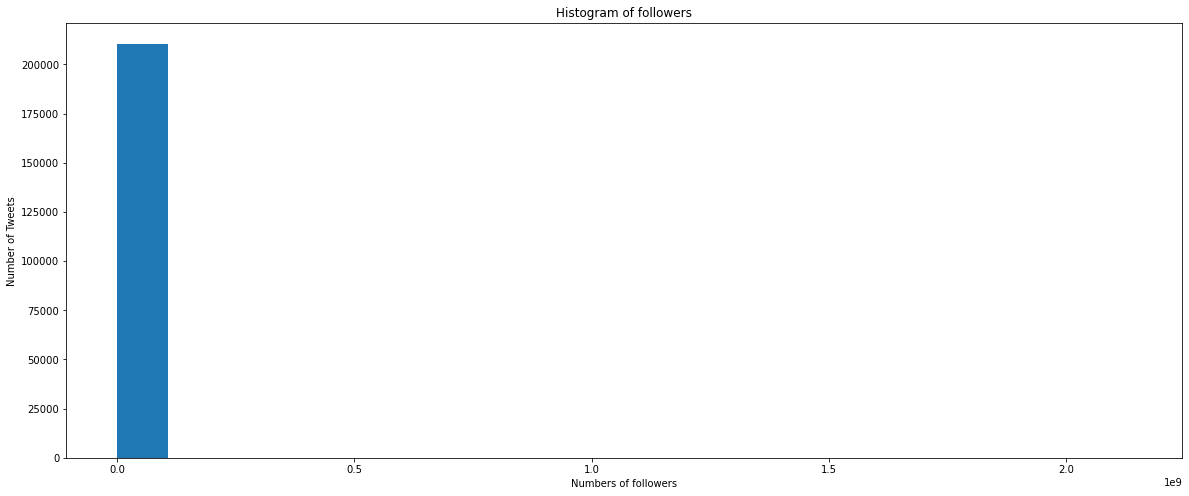

In [12]:
fig1,ax=plt.subplots(figsize=(20,8))
ax.hist(df['Follows'],bins=20)
plt.title("Histogram of followers")
plt.xlabel("Numbers of followers")
plt.ylabel("Number of Tweets")
plt.savefig('followers.png')

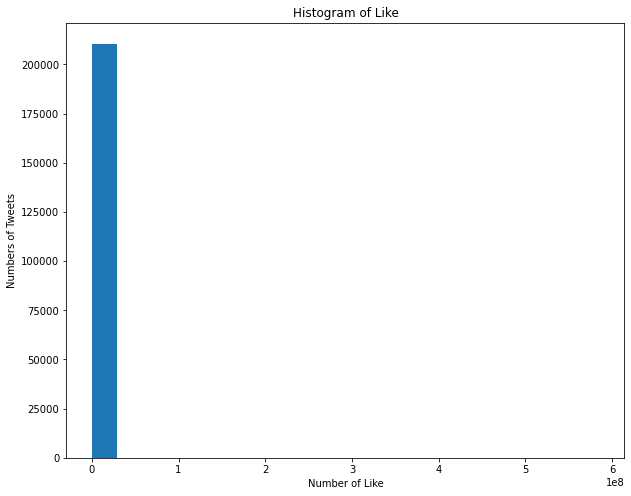

In [13]:
fig1,ax=plt.subplots(figsize=(10,8))
ax.hist(df['Likes'],bins=20)
plt.title("Histogram of Like")
plt.xlabel("Number of Like")
plt.ylabel("Numbers of Tweets")
plt.savefig('Like.png')

In [11]:
df.loc['Total']=df.sum()
df

,Tweet Point,Follows,Likes,text_x,keyword_x,label,unofficial,00,000,0007,...,zones,zrxcyl,zscofficial,zu,zubaertani,zubizareta,zuma,zuzanasuzy111,zwadahsayyed,zxlen99
0,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.2960,1324,594,Dr alhammadi 22 They are also the graves of t...,qatar2022,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210588,-0.3182,106,456,French regional newspaper announces boycott of...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210589,0.9022,199,360,JaniceOwen Steven stole my line It s me ...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210590,0.9545,82,843,I have won a Gold medal by playing Qatar Airwa...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210591,0.6808,491,1063,Germany s 2022 World Cup campaign set to becom...,qatar world cup,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
